# Assignment 1: CARS DATASET

# OUTLINE 
## TASK 1 - Build a function that converts a labelled dataset into labelled and unlabelled subsets
## TASK 2 - Data Cleaning
## TASK 3 - Data Representation
## TASK 4 - Build a partially labelled dataset
## TASK 5 - Create train/validation split
## TASK 6 - Create experiments to convince clients that more labelled data will improve model performance
## TASK 7 - Active Learning to select new instances to be labelled
## TASK 8 - Final model training and evaluation


-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------
Shape of Image: (1024, 3)
----------------------------------------
Head:      0    1   2
0   83   90  46
1  115  123  72
2  131  139  79
3  124  133  68
4  114  120  58
----------------------------------------
Tail:         0    1    2
1019  254  254  254
1020  254  254  254
1021  254  254  254
1022  254  254  254
1023  254  254  254


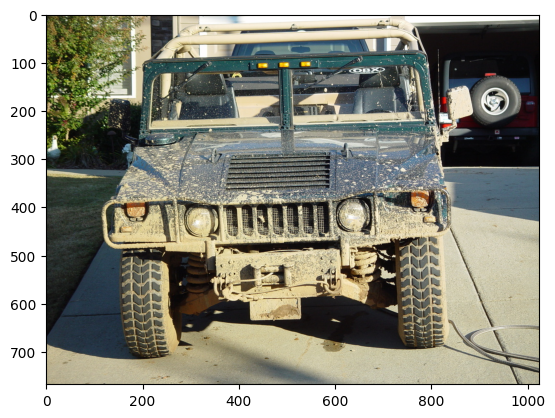

In [29]:
# Viewing/Inspecting Data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_dir = "./dataset/car_ims/000001.jpg"
image = plt.imread(data_dir)
plt.imshow(image)

df = pd.DataFrame(image[0])
print("----------------------------------------")
print("Shape of Image:", df.shape)
print("----------------------------------------")
print("Head:",df.head())
print("----------------------------------------")
print("Tail:", df.tail())

## TASK 1 - Build a function that converts a labelled dataset into labelled and unlabelled subsets

In [30]:
# 1.1: convert the original dataset to a new one including a proportion of unlabelled data

import numpy as np
import pandas as pd

def remove_labels_by_pro(dataset_labels, proportion): 
    
    idx_list = [i for i in range(0, len(dataset_labels))]
    
    df = pd.DataFrame({"instance_idx": idx_list, "class_idx": dataset_labels})
    
    sample_df = df.groupby('class_idx', group_keys=False).apply(lambda x: x.sample(frac=proportion))

    selected_idx = list(sample_df['instance_idx'])
    
    is_labelled = [True for _ in range(len(idx_list))]
    
    for idx in selected_idx:
        is_labelled[idx] = False    

    return is_labelled  # indicate labelled or not, True - labelled, False - unlabelled
    
    
# usage example:----------------------------
# is_labelled = remove_labels_by_pro(dataset_labels, proportion)

# TASK 2 - Data Cleaning

In [35]:
# 2.1: remove non-RGB file

import cv2
import os
import numpy as np

image_dir = "./dataset/car_ims"

def clean_data():
    for img in os.listdir(image_dir):
        try:
            path = os.path.join(image_dir, img)
            img_array = cv2.imread(path)
            shape_array = img_array.shape

            if len(shape_array) != 3 or shape_array[2] != 3:
                os.remove(path)   # remove bad images in the image folder
                print("A bad image {} is removed.".format(img))
                
        except Exception as e:
            os.remove(path)   # remove abnormal files in the image folder
            print("A bad file {} is removed.".format(img))
            
    
clean_data()

A bad file New Text Document.txt is removed.


# TASK 3 - Data Representation

In [37]:
# 3.1: defind methods

import numpy as np # linear algebra
import pandas as pd # data processing
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models

image_dir = "./dataset/car_ims"
IMG_SIZE = 224

# pretrained Resnet18 network as feature vector generator
class feature_extract_resnet18():
    def __init__(self):
        self.device = torch.device("cpu")
        self.numberFeatures = 512
        self.modelName = "resnet-18"
        self.model, self.featureLayer = self.getFeatureLayer()
        self.model = self.model.to(self.device)
        self.model.eval()
        self.toTensor = transforms.ToTensor()
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
    def getFeatureLayer(self):
        cnnModel = models.resnet18(pretrained=True)
        layer = cnnModel._modules.get('avgpool')
        self.layer_output_size = 512

        return cnnModel, layer
    
    def getVec(self, img):
        image = self.normalize(self.toTensor(img)).unsqueeze(0).to(self.device)
        embedding = torch.zeros(1, self.numberFeatures, 1, 1)

        def copyData(m, i, o): 
            embedding.copy_(o.data)

        h = self.featureLayer.register_forward_hook(copyData)
        self.model(image)
        h.remove()

        return embedding.numpy()[0, :, 0, 0]

In [ ]:
# 3.2 feature embedder

all_vectors = {}   # will store all the embeddings

img2vec = feature_extract_resnet18()

transformationForCNNInput = transforms.Compose([transforms.Resize((IMG_SIZE,IMG_SIZE))])

for image in os.listdir(image_dir):
    try:
        I = Image.open(os.path.join(image_dir, image))
        newI = transformationForCNNInput(I)  # preprocessing
        vec = img2vec.getVec(newI)
        all_vectors[image] = vec
        I.close()

    except Exception as e:
        print("Bad image:{}".format(image))  # images with a small size 
        pass
    

C:\Users\Theia\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\Theia\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Bad image:000050.jpg
Bad image:001053.jpg
Bad image:001225.jpg
Bad image:001257.jpg
Bad image:001265.jpg
Bad image:001269.jpg
Bad image:001270.jpg
Bad image:001287.jpg
Bad image:001301.jpg
Bad image:001302.jpg
Bad image:001310.jpg
Bad image:001311.jpg
Bad image:001312.jpg
Bad image:001319.jpg
Bad image:001327.jpg
Bad image:001334.jpg
Bad image:001366.jpg
Bad image:001369.jpg
Bad image:001390.jpg
Bad image:001403.jpg
Bad image:001412.jpg
Bad image:001458.jpg
Bad image:003338.jpg
Bad image:003543.jpg
Bad image:003712.jpg
Bad image:004819.jpg
Bad image:005031.jpg
Bad image:005537.jpg
Bad image:006398.jpg
Bad image:008015.jpg
Bad image:011672.jpg
Bad image:013394.jpg
Bad image:014690.jpg
Bad image:014761.jpg


# smaller than (242,242) 
## 34 files

- Bad image:000050.jpg
- Bad image:001053.jpg
- Bad image:001225.jpg
- Bad image:001257.jpg
- Bad image:001265.jpg
- Bad image:001269.jpg
- Bad image:001270.jpg
- Bad image:001287.jpg
- Bad image:001301.jpg
- Bad image:001302.jpg
- Bad image:001310.jpg
- Bad image:001311.jpg
- Bad image:001312.jpg
- Bad image:001319.jpg
- Bad image:001327.jpg
- Bad image:001334.jpg
- Bad image:001366.jpg
- Bad image:001369.jpg
- Bad image:001390.jpg
- Bad image:001403.jpg
- Bad image:001412.jpg
- Bad image:001458.jpg
- Bad image:003338.jpg
- Bad image:003543.jpg
- Bad image:003712.jpg
- Bad image:004819.jpg
- Bad image:005031.jpg
- Bad image:005537.jpg
- Bad image:006398.jpg
- Bad image:008015.jpg
- Bad image:011672.jpg
- Bad image:013394.jpg
- Bad image:014690.jpg
- Bad image:014761.jpg

In [ ]:
# 3.3: extract the annos data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat

annos = loadmat("./dataset/cars_annos.mat")
print("dict keys:{}".format(annos.keys()))

data_annos = annos['annotations'][0]
len_annos = len(data_annos)
print("length of annotations:{}".format(len_annos))

image_labels = {}
for anno in data_annos:
    image_names = anno[0][0][8:] # file name
    image_labels[image_names] = anno[5][0][0]  #  --> image_labels: 1~196, dictionary
    

# labels = [image_labels[x] for x in image_labels]
# plt.plot(labels)
# plt.show()

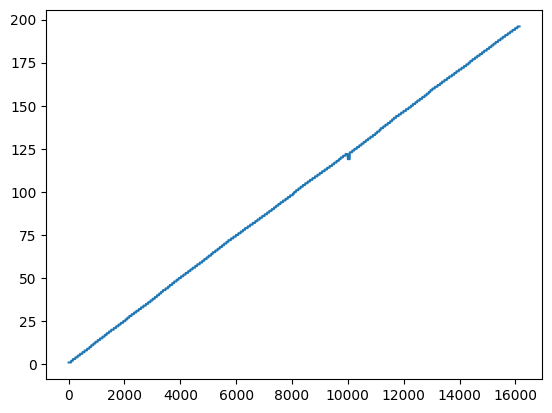

In [42]:
# 3.4: construct the dataset dictionary: 
#
#         {instance_idx:{'embedding':<np.ndarray>, 'class_idx':<int>, 'labelled':<boolean> or int},...}

import torch

# dataset_dict = {}
# idx = 1
# for img in all_vectors:
#     dataset_dict[idx] = {'embedding': all_vectors[img], 'class_idx': image_labels[img], 'labelled': False}
#     idx += 1
    
PATH = "./dataset/data_dict.pt"

# Save:---------------------
# obj = dataset_dict
# torch.save(obj, PATH)

# Load:---------------------
dataset_dict = torch.load(PATH)

# check:--------------------
# labels = [dataset_dict[x]['class_idx'] for x in dataset_dict]
# plt.plot(labels)
# plt.show()


# TASK 4 - Build a partially labelled dataset

In [67]:
# 4.1: unlabelled operation to the original dataset_dict

import pandas as pd
proportion = 0.6

dataset_labels = [dataset_dict[x]['class_idx'] for x in dataset_dict]   # original true labels for images

is_labelled = remove_labels_by_pro(dataset_labels, proportion)  # after unlabelled operation, bool: 0 - unlabelled, 1 - labelled

for idx in dataset_dict:
    dataset_dict[idx]['labelled'] = is_labelled[idx-1]   # update the unlabelled or labelled info into dataset_dict
    
# Save updates:---------------------
PATH = "./dataset/data_dict.pt"
obj = dataset_dict
torch.save(obj, PATH)

# TASK 5 - Create train/validation split

In [66]:
# 5.1: defind train_test_division()

import numpy as np
from sklearn.model_selection import train_test_split

def train_test_division(dataset_inputs, dataset_labels, training_proportion):
    
    test_proportion = 1- training_proportion
    
    training_inputs, test_inputs, training_labels, test_labels = train_test_split(dataset_inputs, dataset_labels, test_size=test_proportion, random_state=8)
    
    return training_inputs, test_inputs, training_labels, test_labels

# TASK 6 - Create experiments to convince clients that more labelled data will improve model performance

In [68]:
# 6.1: loading data

import numpy as np
import torch
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load dataset_dict:---------------------
PATH = "./dataset/data_dict.pt"
dataset_dict = torch.load(PATH)

dataset_inputs = []
dataset_labels = []
dataset_unlabelled = []
orig_labels_unlabelled = []
for idx in dataset_dict:
    if not dataset_dict[idx]['labelled']:  # seperate labelled and unlabelled data
        dataset_unlabelled.append(dataset_dict[idx]['embedding'])
        orig_labels_unlabelled.append(dataset_dict[idx]['class_idx']) 
        continue
    dataset_inputs.append(dataset_dict[idx]['embedding'])
    dataset_labels.append(dataset_dict[idx]['class_idx'])
    
dataset_inputs = np.array(dataset_inputs)
dataset_labels = np.array(dataset_labels)
dataset_unlabelled = np.array(dataset_unlabelled)
orig_labels_unlabelled = np.array(orig_labels_unlabelled)

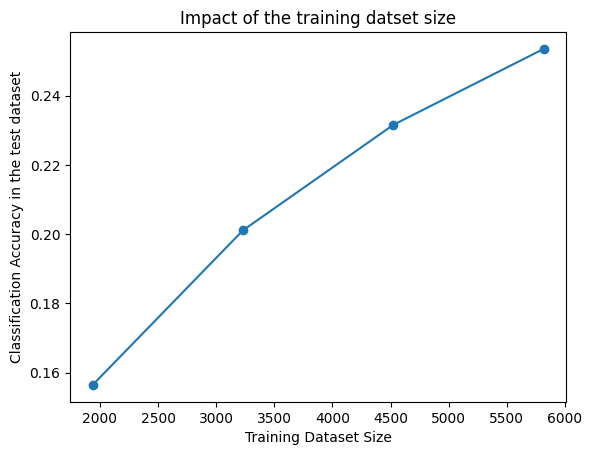

In [70]:
# 6.2 train and evaluate learning models

training_proportions = np.linspace(0.3,0.9,4)   # different propostion to change the size of the training dataset
scores = []

for training_proportion in training_proportions:
    
    training_inputs, test_inputs, training_labels, test_labels = train_test_division(dataset_inputs, dataset_labels, training_proportion)

    clf = make_pipeline(StandardScaler(), SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3))
    clf.fit(training_inputs, training_labels)

    pred_test_labels = clf.predict(test_inputs)

    scores.append(accuracy_score(test_labels, pred_test_labels))

training_inputs_size = np.floor([training_proportions[i] * len(dataset_labels) for i in range(len(training_proportions))])

plt.plot(training_inputs_size, np.array(scores),'-o')
plt.title("Impact of the training datset size")
plt.ylabel('Classification Accuracy in the test dataset') 
plt.xlabel('Training Dataset Size') 
plt.show()

# 6.3: Explation about the experiment

With the pre-defined dataset consisting of 40% labelled and 60% unlabelled data, a supervised learning method is explored. 40% labelled data are used to train and evaluate the learning model. The proportion of training inputs among the labelled data is used to change the size of training data used in the learning process. Models trained on training datasets of different sizes, is used to classify corresponding test datsets. The classification accuracy is calculated by comparing the classified result and the orinal true labels.

From the figure titled with "Impact of the training datset size", we can see the classification accuracy in the test dataset increasing with the size of training datasets. It might concludes that larger size of traing dataset will improve the classification accuracy. Thus, more labelled data are required.

# TASK 7 - Active Learning to select new instances to be labelled

In [72]:
#7.1 constructe a final dataset, increasing the proportion of labelled data by active learning

from scipy.stats import entropy

# train models using 40% labelled data
dataset_inputs = np.array(dataset_inputs)
dataset_labels = np.array(dataset_labels)

clf = make_pipeline(StandardScaler(), SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3))
clf.fit(dataset_inputs, dataset_labels)
# pred_prob = clf.predict_proba(dataset_inputs)

pred_prob_unlabelled = clf.predict_proba(dataset_unlabelled)
entropy_unlabelled = []
for i in range(len(pred_prob_unlabelled)):
    instance = pred_prob_unlabelled[i]
    entropy_unlabelled.append([i, entropy(instance, base=2)])
    
entropy_unlabelled.sort(key=lambda x:x[1], reverse= True)  # sort in decending order
K = int(np.floor(0.25 * len(dataset_dict)))  # the num. of additional data 

added_idx = [x[0] for x in entropy_unlabelled]
added_dataset = []
added_data_labels = []
for k in range(K):
    added_dataset.append(dataset_unlabelled[added_idx[k]])
    added_data_labels.append(orig_labels_unlabelled[added_idx[k]])
    
added_dataset = np.array(added_dataset)
added_data_labels = np.array(added_data_labels)

# final dataset of 65% labelled data
dataset_final = np.concatenate((dataset_inputs, added_dataset), axis=0)
labels_final = np.concatenate((dataset_labels, added_data_labels), axis=0)

In [73]:
print(dataset_final.shape,labels_final.shape)

(10500, 512) (10500,)


# TASK 8 - Final model training and evaluation

C:\Users\Theia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\Theia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


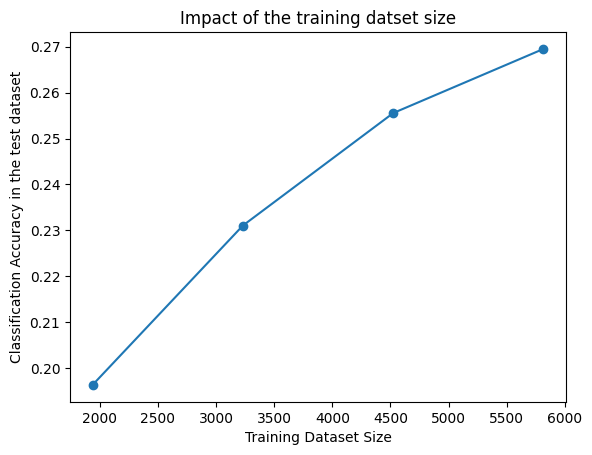

In [74]:
training_proportions = np.linspace(0.3,0.9,4)   # different propostion to change the size of the training dataset
scores = []

for training_proportion in training_proportions:
    
    training_inputs, test_inputs, training_labels, test_labels = train_test_division(dataset_final, labels_final, training_proportion)

    clf = make_pipeline(StandardScaler(), SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3))
    clf.fit(training_inputs, training_labels)

    pred_test_labels = clf.predict(test_inputs)

    scores.append(accuracy_score(test_labels, pred_test_labels))

training_inputs_size = np.floor([training_proportions[i] * len(dataset_labels) for i in range(len(training_proportions))])
plt.plot(training_inputs_size, np.array(scores),'-o')
plt.ylabel('Classification Accuracy in the test dataset') 
plt.xlabel('Training Dataset Size') 
plt.title("Impact of the training datset size")
plt.show()

## 8.2: Explanation 
Based on my evaluation, the decision to label more instance seems to have a little bit improvement on the classification accuracy results, by comparing the last two figures. 

In my opinion, there might be several reasons. One reason is the way to choose the additional 25% labelled data, which seems not a good way. Besides, SGDClassifier needs more effort to make it work well if more time is provided, which is not seriously required in the exam requirement. Last, more labelled data is need.